In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("red_wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#sb.pairplot(data)

In [4]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

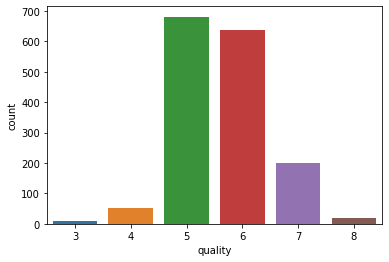

In [5]:
sb.countplot(data['quality'])

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

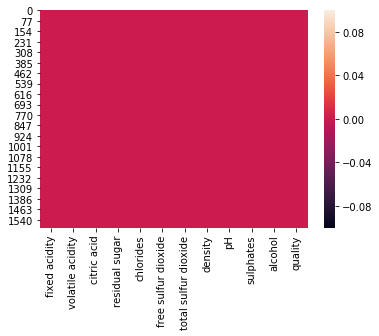

In [7]:
sb.heatmap(data.isnull())

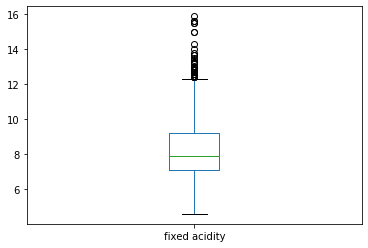

In [8]:
#checking outliers using plot box
data['fixed acidity'].plot.box()

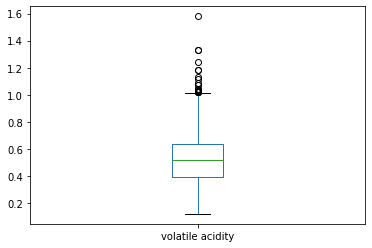

In [9]:
data['volatile acidity'].plot.box()

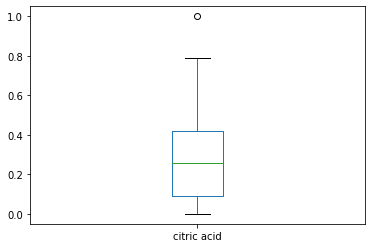

In [10]:
data['citric acid'].plot.box()

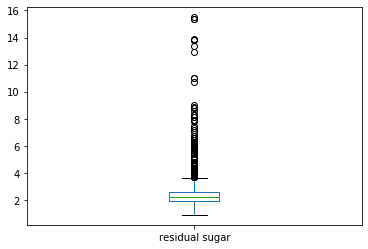

In [11]:
data['residual sugar'].plot.box()

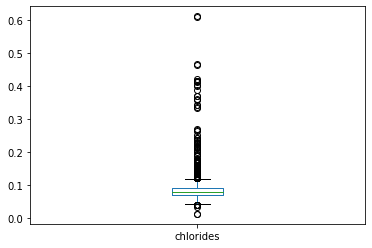

In [12]:
data['chlorides'].plot.box()

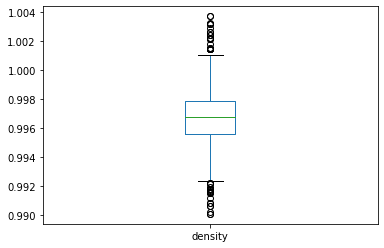

In [13]:
data['density'].plot.box()

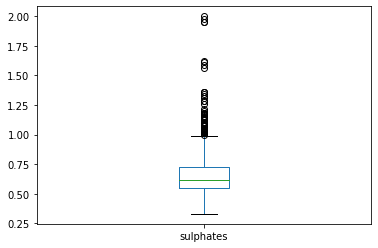

In [14]:
data['sulphates'].plot.box()

In [15]:
#Removing outliers with the help of zscore
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [16]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [17]:
data_new=data[(z<3).all(axis=1)]
data_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
print(data.shape)
print(data_new.shape)

(1599, 12)
(1451, 12)


In [19]:
# for predicting good quality of wine we are differntiating the quality into 3 outputs
reviews = []
for i in data_new['quality']:
    if i >= 1 and i <= 4:
        reviews.append('1')
    elif i >= 5 and i <= 6:
        reviews.append('2')
    elif i >= 7 and i <= 8:
        reviews.append('3')
data_new['Reviews'] = reviews

In [20]:
x=data_new.iloc[:,:11]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)

In [22]:
x.skew()

0     0.823934
1     0.380659
2     0.291297
3     2.456107
4     2.275162
5     0.869250
6     1.183161
7     0.055738
8     0.114705
9     0.891492
10    0.758958
dtype: float64

In [23]:
x=np.log1p(x)

In [24]:
x.skew()

0     0.511316
1     0.061465
2     0.041689
3     1.943423
4     1.489137
5     0.592099
6     0.852018
7    -0.311398
8    -0.226447
9     0.575875
10    0.518689
dtype: float64

In [25]:
y=data_new["Reviews"]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Reviews, dtype: object

In [26]:
print(x.shape)
print(y.shape)

(1451, 11)
(1451,)


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1160, 11)
(1160,)
(291, 11)
(291,)


In [29]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.8213058419243986
[[  0  11   0]
 [  0 239   0]
 [  0  41   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.82      1.00      0.90       239
           3       0.00      0.00      0.00        41

    accuracy                           0.82       291
   macro avg       0.27      0.33      0.30       291
weighted avg       0.67      0.82      0.74       291



In [30]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8213058419243986
[[  0  11   0]
 [  0 239   0]
 [  0  41   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.82      1.00      0.90       239
           3       0.00      0.00      0.00        41

    accuracy                           0.82       291
   macro avg       0.27      0.33      0.30       291
weighted avg       0.67      0.82      0.74       291



In [31]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8316151202749141
[[  1  10   0]
 [  3 212  24]
 [  0  12  29]]
              precision    recall  f1-score   support

           1       0.25      0.09      0.13        11
           2       0.91      0.89      0.90       239
           3       0.55      0.71      0.62        41

    accuracy                           0.83       291
   macro avg       0.57      0.56      0.55       291
weighted avg       0.83      0.83      0.83       291



In [32]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8281786941580757
[[  0  11   0]
 [  1 226  12]
 [  2  24  15]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.87      0.95      0.90       239
           3       0.56      0.37      0.44        41

    accuracy                           0.83       291
   macro avg       0.47      0.44      0.45       291
weighted avg       0.79      0.83      0.80       291



In [33]:
pip install knime

Note: you may need to restart the kernel to use updated packages.


In [34]:
import knime

In [35]:
knime.executable_path="C:/Users/Karan/knime-workspace"

In [36]:
wf = knime.Workflow("C:/Users/Karan/knime-workspace/KNIME_project _Redwine")

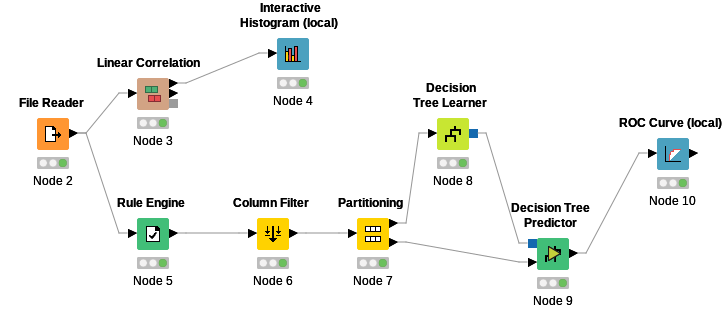

In [37]:
wf